# Ecommerce Linear regression

## Import packages

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

## Dataset

In [13]:
df = pd.read_csv(r'Datasets/Ecommerce.csv')

In [15]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [31]:
df['Avatar'].nunique()

138

## Analyse Data

In [38]:
y = 'Yearly Amount Spent'
X = ['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']

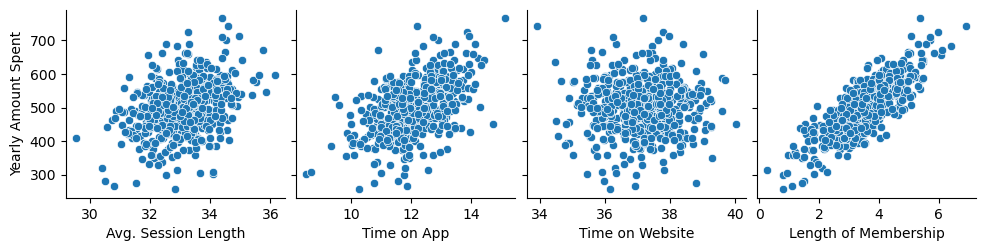

In [40]:
sns.pairplot(df, y_vars=y, x_vars=X)

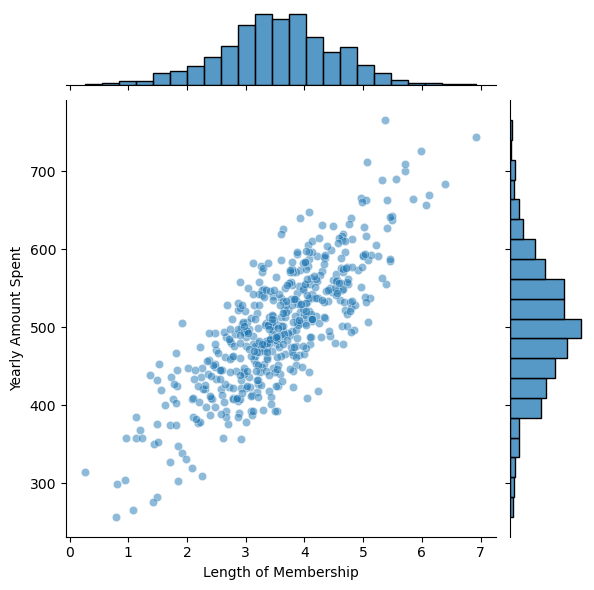

In [46]:
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent", data=df, alpha=0.5)

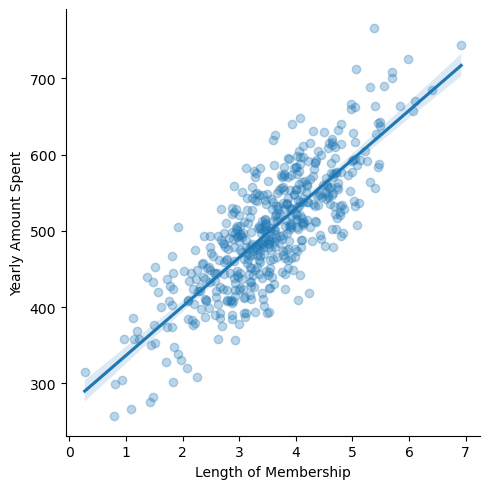

In [58]:
sns.lmplot(x = 'Length of Membership', y = y, data = df, scatter_kws={'alpha':0.3})

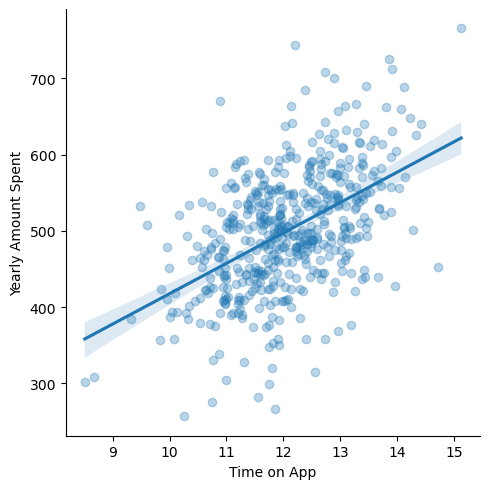

In [60]:
sns.lmplot(x = 'Time on App', y = y, data = df, scatter_kws={'alpha':0.3})

## Split Data

In [67]:
X_data = df[X]
y_data = df[y]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=10)

In [80]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
151,32.887105,12.387184,37.431159,6.401229
424,34.370327,11.887800,37.861447,3.046620
154,36.139662,12.050267,36.959643,3.864861
190,34.713317,12.038808,37.635299,4.632461
131,32.439770,12.424130,38.948825,4.920318
...,...,...,...,...
12,29.532429,10.961298,37.420216,4.046423
97,34.183821,13.349913,37.827394,4.252006
130,33.700400,11.924395,37.245032,3.905250
472,33.665990,12.263718,38.860234,3.139527


In [73]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
84,34.655486,10.338073,36.157256,4.396652
388,33.590486,10.942070,36.170494,2.783963
149,32.384733,10.861604,36.584438,3.993657
101,31.885406,11.281931,37.385318,2.877225
451,33.943119,11.484199,36.839366,2.402454


## Build the model

In [76]:
regressor = LinearRegression()

## Train the model

In [78]:
regressor.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [84]:
# print params
print(regressor.intercept_)
print(regressor.coef_)

-1079.4178988455815
[25.89535967 38.84416514  0.9679482  61.86922459]


In [88]:
coeff_df = pd.DataFrame(regressor.coef_, X_data.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.895360
Time on App,38.844165
Time on Website,0.967948
Length of Membership,61.869225


## Predictions from our Model

In [91]:
predictions = regressor.predict(X_test)

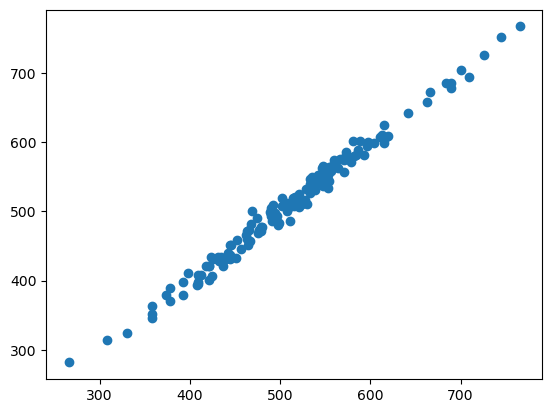

In [95]:
plt.scatter(y_test, predictions)

print('R²:', metrics.r2_score(y_test, predictions))

In [102]:
print('R²:', metrics.r2_score(y_test, predictions))

R²: 0.9871395472085016


In [112]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  7.896670984962896
Mean Squared Error:  93.83097002877325
RMSE:  9.686638737393547
